# Saurabh Bhattarai
# BHA22597750
link to the new dataset in kaggle: https://www.kaggle.com/datasets/mh0386/facial-emotion

link to the preprocessed dataset in my google drive: https://drive.google.com/drive/folders/1EDZu_B2QPvn0tZDxVB3riBhmgM0C0YGr?usp=sharing

link to the saved model from milestone_2 in my google drive: https://drive.google.com/file/d/1WRA9yKHmVqehZhbRnPlUsmUuHGUgM_j4/view?usp=sharing

link to this colab notebook: https://colab.research.google.com/drive/1IBse646ys_iElvSR25oYAufulpZnNwR4?usp=sharing

**Overview:** This is the code file for milestone_3. In milestone_2, TinyVGG model was trained with an image dataset of 8 different facial expresisons (classes). Achiving a decent accuracy in that milestone, this milestone (milestone_2) test the model with some new unseen data. The dataset is an open source dataset available in kaggle and link is given below:

https://www.kaggle.com/datasets/mh0386/facial-emotion

This dataset consists of 152 images, 19 images per class. The images shapes are inconsistence, hence some preprocessing was required before passing through the model.


In this notebook, the model is tested with new data and evaluated with several evaluation metrics.

# 1. Loading the model
Importing libraries, creating 'TinyVGG' model and upload the weights and biases of the trained model from 'milestone_2' to this newly created model

In [ ]:
# importing libraries
import torch
from torch import nn

Device Agnositic Code

In [ ]:
# Make sure to set all the tensors on the same device
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 1.1. Copy the 'TinyVGG' model architecture from 'milestone_2'

In [ ]:
# Create a class of TinyVGG that inherits from nn.Module
class TinyVGG(nn.Module):

    # Initializing
    def __init__(self, num_classes=8):
        super(TinyVGG, self).__init__()

        # Defining the Convolution layers, MaxPool layers with activation function 'ReLU'
        self.features = nn.Sequential(

          # First Conv2d layer for extracting feature map
            nn.Conv2d(3, 32, kernel_size=3, padding=1),

            # Adding non-linearity
            nn.ReLU(inplace=True),

            # Maxpool layer for downsampling feature map
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Another Convolutional layer
            nn.Conv2d(32, 64, kernel_size=3, padding=1),

            # ReLU()
            nn.ReLU(inplace=True),

            # Max pooling layer
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Defining the classifier (Fully Connected layers)
        self.classifier = nn.Sequential(
            nn.Linear(36864, 128),  # The input size is adjusted by experimentation
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(128, num_classes)
        )

    # The forward method
    def forward(self, x):
        x = self.features(x)

        # Flatten the input image feature map and passing through classifier
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [ ]:
# Mounting the drive to import the saved model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the weights and biases of the trained model
loaded_model = TinyVGG().to(device)
loaded_model.load_state_dict(torch.load('/content/drive/MyDrive/saved_model/FER_Model.pt'))

<All keys matched successfully>

In [ ]:
# print(loaded_model.state_dict())

# 2. Loading a new dataset

In [ ]:
# Importing necessary libraries to import the images
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
from PIL import Image
from tqdm.auto import tqdm

# Set the transformation
transform = transforms.Compose([
    transforms.Resize((96,96)),  # Resize the image to 96,96 pixels
    transforms.ToTensor()  # Convert image to tensor
])

# Set up the path to the new dataset
dataset_path = '/content/drive/MyDrive/new test data/data'


# Initialize lists to store images and labels
images_list = []
labels_list = []

# Initialize dictionary to store label indices and labels
label_dict = {}

# Load images from each class folder
class_idx = 0

# Iterate over class folders
for class_name in tqdm(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):

        # Assign label index
        label_dict[class_idx] = class_name

        # Iterate over image files in class folder
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            if os.path.isfile(img_path):

                # Load image and apply transformation
                image = Image.open(img_path)
                image = transform(image)

                # Append image and label to respective lists
                images_list.append(image)
                labels_list.append(class_idx)
        class_idx += 1

# Display the number of images loaded for each class
print("Number of classes:", class_idx)
print("Total number of images:", len(images_list))

  0%|          | 0/8 [00:00<?, ?it/s]

Number of classes: 8
Total number of images: 152


In [ ]:
len(images_list), len(labels_list)

(152, 152)

In [ ]:
label_dict

{0: 'surprised',
 1: 'angry',
 2: 'sad',
 3: 'neutral',
 4: 'happy',
 5: 'Contempt',
 6: 'fear',
 7: 'disgust'}

## 2.1. Label Consistency

It looks like the image labels indexes are not as same as the dataset that is used to train the model. Hence, creating a dictionary to make the labels and label indexes same.

In [ ]:
# The original labels and their corresponding indices
labels_idx={'fear': 0,
                  'disgust': 1,
                  'surprised': 2,
                  'Contempt': 3,
                  'angry': 4,
                  'neutral': 5,
                  'sad': 6,
                  'happy': 7}

Now changing the 'lables_list' on the basis of original label index to ensure label consistency.

In [ ]:
# Convert label indexes using labels_idx
converted_labels_list = [labels_idx[label_dict[idx]] for idx in labels_list]

# Check the labels list
print(converted_labels_list)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# Chech the labels list
print(labels_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [ ]:
# Set up the index as key and label as values for future use
labels_index={0:'fear',
              1:'disgust',
              2:'surprised',
              3:'Contempt',
              4:'angry',
              5:'neutral',
              6:'sad',
              7:'happy'}

Sending the images and labels into the current device to avoid device mismatch

In [ ]:
images_list = [tensor.to(device) for tensor in images_list]
converted_labels_list = [torch.tensor(label).to(device) for label in converted_labels_list]

In [ ]:
images_list[0].device, images_list[0].shape, converted_labels_list[0].device, converted_labels_list[0].shape

(device(type='cuda', index=0),
 torch.Size([3, 96, 96]),
 device(type='cuda', index=0),
 torch.Size([]))

# 3. Let's see some random images inside the dataset **(VISUALIZATION)**

In [ ]:
# Change the tensor labels list into integer list for visualization and sending them to CPU
vis_labels = [int(tensor.cpu().item()) for tensor in converted_labels_list]

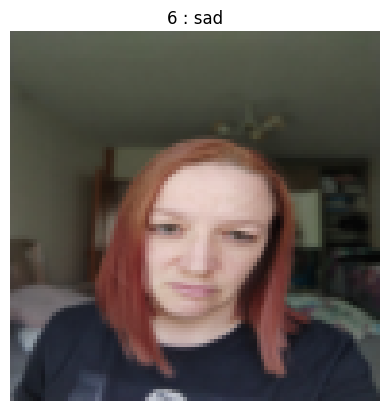

47


In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Get a random number
rand = torch.randint(0,len(images_list),size=[1]).item()

# Plot the image and set the title as image label and label index
plt.imshow(images_list[rand].cpu().permute(1,2,0))
plt.title(f'{vis_labels[rand]} : {labels_index[vis_labels[rand]]}')
plt.axis(False)
plt.show();

# Show up the random number
print(rand)

More VISUALIZATION

  0%|          | 0/16 [00:00<?, ?it/s]

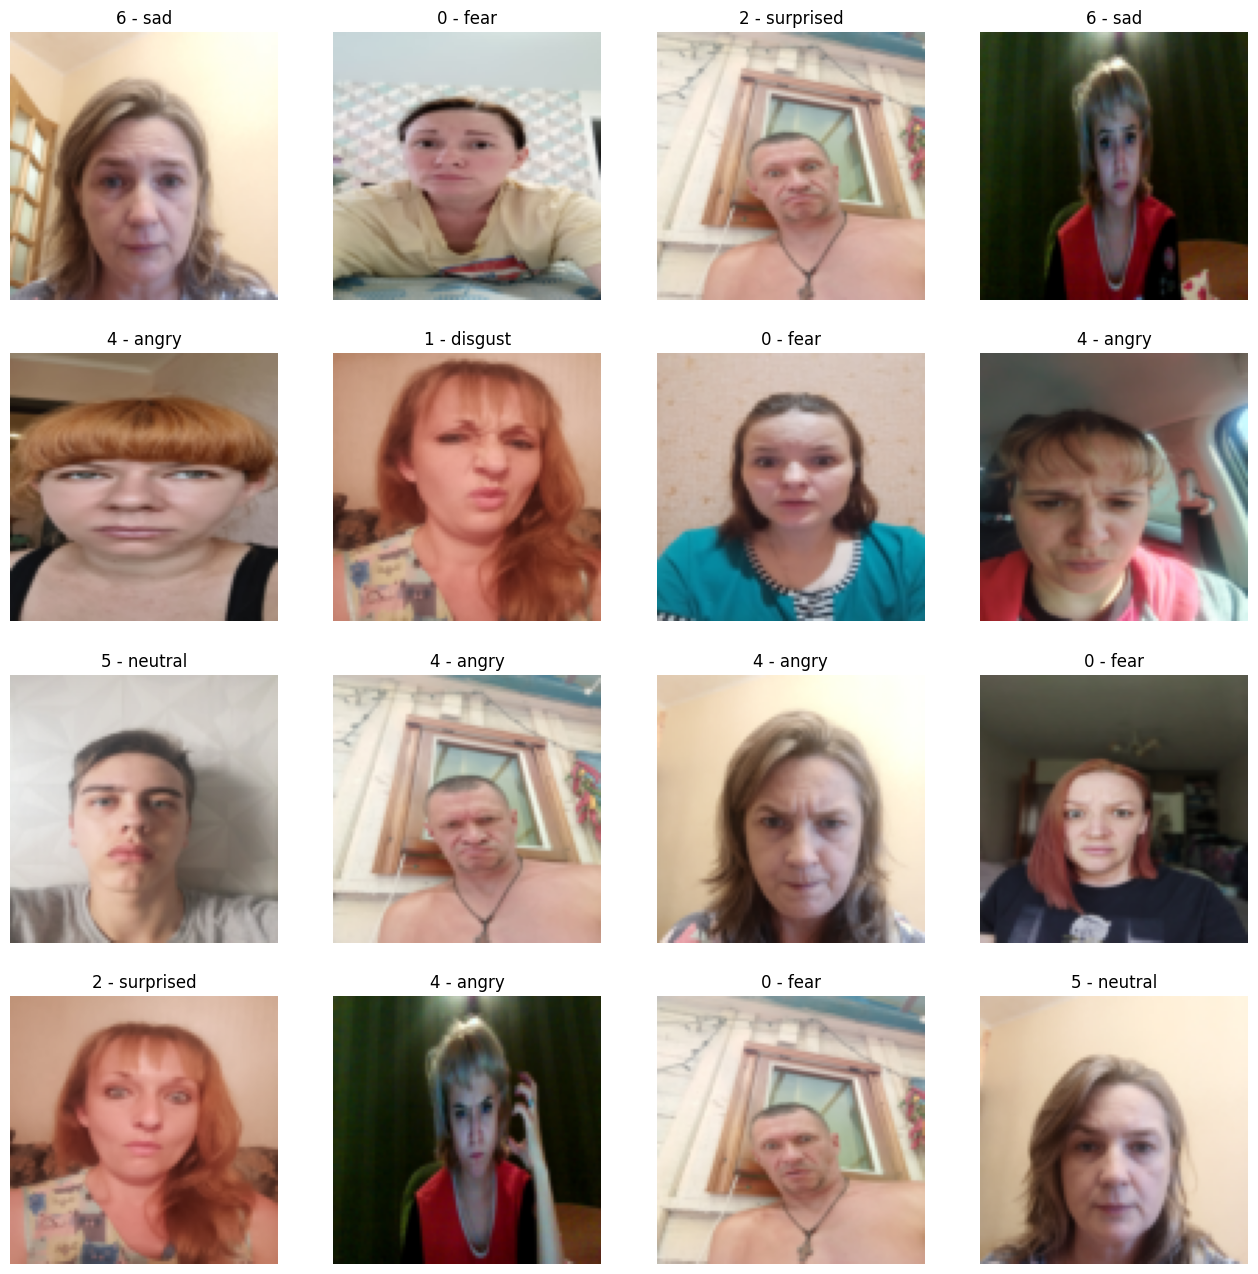

The image indexes in dataset is: [44, 130, 14, 41, 37, 134, 114, 35, 61, 34, 24, 119, 2, 19, 129, 66]


In [ ]:
# Defining the figure
fig = plt.figure(figsize=(16,16))

# Defining the number of rows and columns of the image
rows,cols=4,4
random_image_index=[]
# Running a loop
for i in tqdm(range(1, rows*cols+1)):

  # Getting random integers
  random_idx = torch.randint(0,len(images_list), size=[1]).item()

  # Getting the image
  img, class_index= images_list[random_idx], vis_labels[random_idx]

  # Defining where the image should be plotted
  fig.add_subplot(rows,cols,i)

  # Plotting the images along with their labels and index
  plt.imshow(img.permute(1,2,0).cpu())
  plt.title(f'{class_index} - {labels_index[class_index]}')
  plt.axis(False)
  random_image_index.append(random_idx)
plt.show()
print(f'The image indexes in dataset is: {random_image_index}')

# 4. Get the data ready for **Evaluation**

In [ ]:
# Merge the data and labels
data = list(zip(images_list,converted_labels_list))

In [ ]:
# Send the dataset to the current device
for image,label in data:
  image = image.to(device)
  label = label.to(device)
image.device, label.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [ ]:
from torch.utils.data import DataLoader

# Set up the batch size
BATCH_SIZE = 10

# Turn datasets into batches (iterables)
data_loader = DataLoader(dataset=data,
                         batch_size=BATCH_SIZE,
                         shuffle=False)

In [ ]:
# Get predictions for first batch
for x,y in data_loader:
  with torch.inference_mode():
    pred=loaded_model(x)
    y_pred=torch.softmax(pred.squeeze(), dim=0).argmax(dim=1)
  break
print('Predictions: ',y_pred)
print('Original: ', y)

Predictions:  tensor([4, 0, 1, 7, 1, 7, 5, 6, 3, 5], device='cuda:0')
Original:  tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')


# 5. Evaluate the 'TingVGG' model by the new dataset

## 5.1. Create an evaluation function

In [ ]:
# Functionizing the evaluation function
def eval_fn(e_model: nn.Module,
            e_data,
            e_loss_fn: torch.nn.Module,
            e_accuracy_fn,
            ):

  # This function returns a dictionary of the evaluation results

  loss=0
  acc=0

  # Evaluation mode on
  e_model.eval()

  # Gradient tracking off
  with torch.inference_mode():

    # Evaluation loop
    for X, y in tqdm(data_loader):

      # Make predictions
      pred = e_model(X)

      # Accumulate loss and accuracy
      loss += e_loss_fn(pred,y)
      acc += e_accuracy_fn(y_true=y,
                         y_pred=torch.softmax(pred.squeeze(), dim=0).argmax(dim=1))

    # Finding the average of accuracy and loss

    loss = loss/len(data_loader)
    acc = acc/len(data_loader)

    # Return the model name (actual name used to create model class), loss and accuracy
    return {'Model_Name': e_model.__class__.__name__,
            'Model_Loss': loss.item(),
            'Model_Accuracy': acc,
            }

## 5.2. Set up loss function and creating an accuracy function

In [ ]:
# Setup loss
loss_fn=nn.CrossEntropyLoss()

# Creating an accuracy function
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  accuracy=(correct/len(y_true))*100
  return accuracy

## 5.3. Evaluate the model and get the result

### 5.3.1. Evaluation using accuracy

In [ ]:
model_evaluation_results = eval_fn(e_model=loaded_model,
                                   e_data = data_loader,
                                   e_loss_fn=loss_fn,
                                   e_accuracy_fn=accuracy_fn
                                   )
model_evaluation_results

  0%|          | 0/16 [00:00<?, ?it/s]

{'Model_Name': 'TinyVGG',
 'Model_Loss': 2.9838852882385254,
 'Model_Accuracy': 10.0}

### 5.3.2. Evaluation using F1 Score, Precision and Recall

Get the predictions of the model

In [ ]:
# Turn on eval mode and stop graident tracking
loaded_model.eval()
with torch.inference_mode():

  # Initialize the predictions
  predictions=[]
  original_labels=[]

  # Get the predictions
  for X, y in tqdm(data_loader):
    y_pred_logits = loaded_model(X)
    y_pred = torch.softmax(y_pred_logits.squeeze(), dim=0).argmax(dim=1)
    predictions.append(y_pred)
    original_labels.append(y)

  0%|          | 0/16 [00:00<?, ?it/s]

Make lists of original labels and the predictions for easy comparison

In [ ]:
predictions = [item for sublist in predictions for item in sublist.tolist()]
original_labels = [item for sublist in original_labels for item in sublist.tolist()]

In [ ]:
# Check what is inside
predictions[:5], original_labels[:5]

([4, 2, 1, 0, 1], [2, 2, 2, 2, 2])

Compute the evaluation metrics

In [ ]:
# Import from sklearn
from sklearn.metrics import f1_score, precision_score, recall_score

# Compute f1 score, precision and recall
f1_score=f1_score(original_labels,predictions,average='weighted')
precision_score = precision_score(original_labels,predictions,average='weighted')
recall_score = recall_score(original_labels,predictions,average='weighted')

In [ ]:
# Creating a dictionary of evaluation metrics
eval_model = {
    'F1 Score': f1_score,
    'Precision': precision_score,
    'Recall': recall_score
}
print(f'The evaluation of {loaded_model.__class__.__name__}')

# Print the evaluation metrics
eval_model

The evaluation of TinyVGG


{'F1 Score': 0.103792101706094,
 'Precision': 0.10454259534754891,
 'Recall': 0.10526315789473684}

### 5.3.1. Manual Evaluation
Plotting some images with original and predicted labels

In [ ]:
# Create some random samples from the test dataset
import random
# torch.manual_seed(42)
test_samples=[]
test_labels=[]

# Get some random samples
for sample, label in random.sample(list(data), k=16):
  # Adding samples to the list
  test_samples.append(sample)
   # Adding corresponding labels to another list
  test_labels.append(int(label))
len(test_samples)

16

In [ ]:
# Making prediction for those samples
pred=[]

# Making prediction using loop
for i in range(len(test_samples)):
  # Getting the logits
  with torch.inference_mode():
    pred_logits = loaded_model(test_samples[i].unsqueeze(dim=0))

  # Get the prediction probabilities for our samples
    pred_probs = torch.softmax(pred_logits, dim=1).argmax(dim=1)
    pred.append(int(pred_probs))

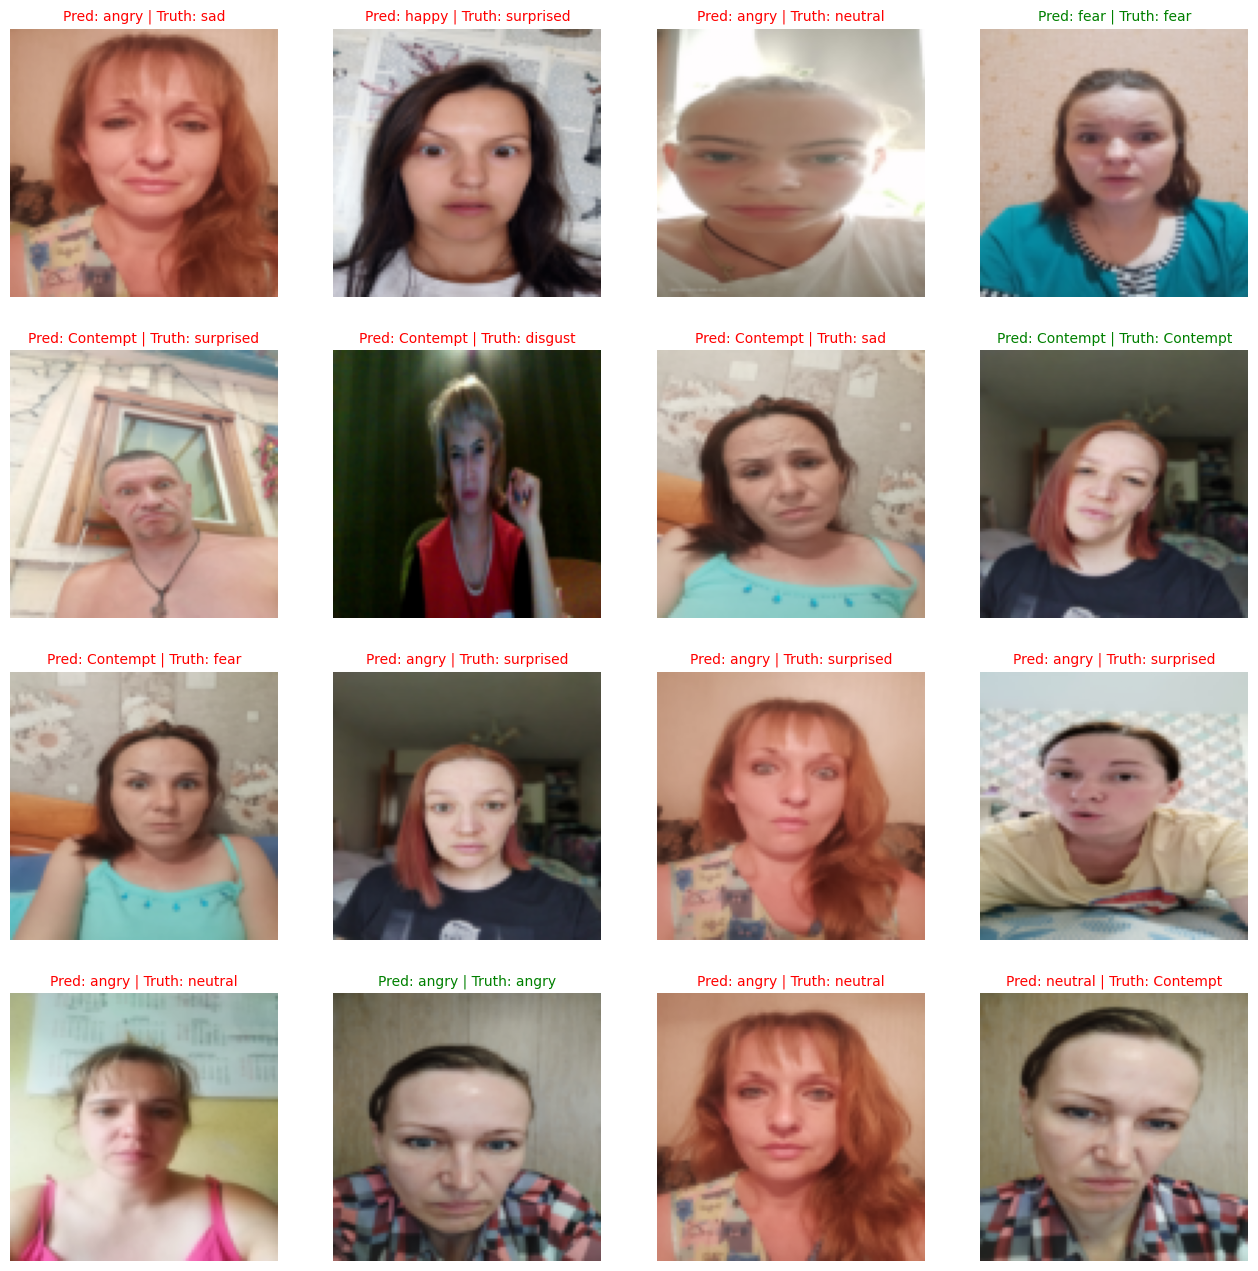

In [ ]:
# Plot those images along with the predictions
plt.figure(figsize=(16,16))
nrows, ncols = 4,4
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.cpu().permute(1,2,0) )

  # Find the prediction
  pred_label =labels_index[pred[i]]

  # Get the truth label
  truth_label = labels_index[test_labels[i]]

  # Change the title for the plot
  title_text = f'Pred: {pred_label} | Truth: {truth_label}'

  '''Show red text title if the prediction is incorrect
    Show green text title of the prediction is correct'''

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')
  plt.axis(False)
plt.show()

### 5.3.2. Evaluation using **CONFUSION MATRIX**

In [ ]:
# Installing and importing torchmetrics
!pip install torchmetrics
from torchmetrics import ConfusionMatrix
import mlxtend
mlxtend.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

'0.22.0'

In [ ]:
y_preds = []
loaded_model.eval()
with torch.inference_mode():
  for X in tqdm(images_list):
    X = X.to(device)
    # Forward pass
    y_logit = loaded_model(X.unsqueeze(0))
    # Turn prediction from logits and logits to prediction labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    # put predictions on cpu for plotting
    y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

  0%|          | 0/152 [00:00<?, ?it/s]

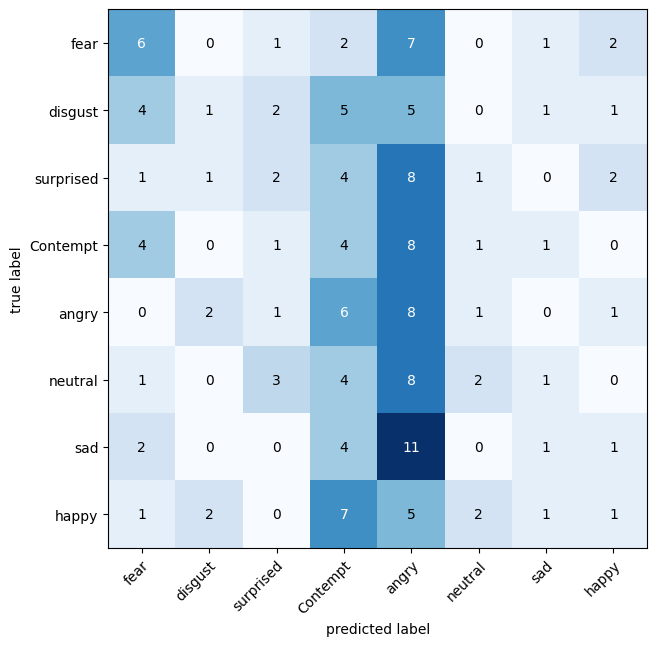

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion instance and compare pardictions to targets
confmat = ConfusionMatrix(task = 'multiclass',num_classes=len(labels_index))
confmat_tesnor=confmat(preds=y_pred_tensor,
                       target=torch.tensor(converted_labels_list))

# Plot our confusion matrix
fig, ax = plot_confusion_matrix(

    # matplotlib only works with numpy arrays and cnnot work with tensors
    conf_mat=confmat_tesnor.numpy(),
    class_names=labels_idx,
    figsize=(10,7)
      )